# Random Forest Classifier

Random Forest, denetimli makine öğrenimi modelilir. Bu çalışmada, bir kişinin yılda 50 bin dolardan fazla kazanıp kazanmadığını tahmin etmek için iki Random Forest Sınıflandırıcı modeli oluşturduk, biri 5 karar ağacıyla ve diğeri 100 karar ağacıyla. Beklenen doğruluk, modeldeki karar ağaçlarının sayısıyla artar. Random Forest modelini kullanarak özellik seçimi sürecini gösteriyoruz. Bu projede Gelir sınıflandırma veri setini kullanılıyoruz.

kaynak:https://www.kaggle.com/datasets/lodetomasi1995/income-classification

## 1. Kütüphaneleri Yükle

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## 2. Verisetini Yükle

In [2]:
data = 'income_evaluation.csv'

df = pd.read_csv(data)

## 3. Exploratory data analysis (EDA)

### 3.1 Veri Kümesinin Görünüm Boyutları 

In [3]:
print('Veri kümesinin şekli : ', df.shape)

Veri kümesinin şekli :  (32561, 15)


Veri setinde 32561 örnek ve 15 özellik olduğunu görebiliriz.

### 3.2 Veri kümesini önizlenimi

In [4]:
df.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

### 3.3 Sütun adlarını yeniden adlandırma

Veri kümesinin uygun sütun adlarına sahip olmadığını görebiliriz. Sütun adları alt çizgi içermeli.

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### 3.4 Veri kümesinin özeti

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Bulgular

- Veri setinin 9 karakter değişkeni ve 6 sayısal değişken içerdiğini görebiliriz.

- `income` hedef değişkenidir.

- Veri setinde eksik değer bulunmamaktadır (şuanlık)

### 3.5 Sütunların Veri Türlerini Kontrol Etme

- Yukarıdaki `df.info()` komutu bize doldurulmuş değerlerin sayısını ve sütunların veri türlerini verir.

- Belirli bir sütunun veri türünü kontrol etmek istiyorsak, aşağıdaki komutu kullanabiliriz.

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### 3.6 Veri Setinin İstatistiksel Özelliklerini Görüntüle

In [8]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

- Yukarıdaki `df.describe()` komutu istatistiksel özellikleri dikey formatta sunar.

- Eğer istatistiksel özellikleri yatay formatta görüntülemek istiyorsak, aşağıdaki komutu çalıştırmalıyız.

In [9]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education_num   32561.0      10.080679       2.572720      1.0       9.0   
capital_gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital_loss    32561.0      87.303830     402.960219      0.0       0.0   
hours_per_week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education_num       10.0      12.0       16.0  
capital_gain         0.0       0.0    99999.0  
capital_loss         0.0       0.0     4356.0  
hours_per_week      40.0      45.0       99.0

Yukarıdaki df.describe().T komutunun istatistiksel özellikleri yatay formatta sunduğunu görebiliriz.

#### Dikkat Edilmesi Gereken Önemli Noktalar


- Yukarıdaki `df.describe()` komutu, sayısal değişkenlerin istatistiksel özelliklerini görmemize yardımcı olur. Karakter değişkenlerini dışlar.

- Eğer karakter değişkenlerinin istatistiksel özelliklerini görmek istiyorsak, aşağıdaki komutu çalıştırmalıyız -

        `df.describe(include=['object'])`

- Eğer tüm değişkenlerin istatistiksel özelliklerini görmek istiyorsak, aşağıdaki komutu çalıştırmalıyız -

        `df.describe(include='all')`

In [10]:
df.describe(include='all')

age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 32561            32561        32561   32561  32561   
unique                    7               15            6       5      2   
top      Married-civ-spouse   Prof-specialty      Husband   White   Male   
freq                  14976             4140        13193   27816  21790   
mean                    NaN              NaN          NaN     NaN    NaN   
std                     NaN              NaN          NaN     NaN    NaN   
min                     NaN              NaN          NaN     NaN    NaN   
25%                     NaN              NaN          NaN     NaN    NaN   
50%                     NaN              NaN          NaN     NaN    NaN   
75%                     NaN              NaN          NaN     NaN    NaN   
max                     NaN              NaN          NaN     NaN    NaN   

        capital_gain  capital_loss  hours_per_week  native_country  income  
count   32561.000000  32561.000000    32561.000000           32561   32561  
unique           NaN           NaN             NaN              42       2  
top              NaN           NaN             NaN   United-States   <=50K  
freq             NaN           NaN             NaN           29170   24720  
mean     1077.648844     87.303830       40.437456             NaN     NaN  
std      7385.292085    402.960219       12.347429             NaN     NaN  
min         0.000000      0.000000        1.000000             NaN     NaN  
25%         0.000000      0.000000       40.000000             NaN     NaN  
50%         0.000000      0.000000       40.000000             NaN     NaN  
75%         0.000000      0.000000       45.000000             NaN     NaN  
max     99999.000000   4356.000000       99.000000             NaN     NaN

### 3.7 Eksik Değerleri Kontrol Etme 

- Python'da eksik veriler iki değerle temsil edilir:

   - **None** : None, Python kodunda sıkça eksik veriler için kullanılan bir Python tekil nesnesidir.

   - **NaN** : NaN, Not a Number'ın kısaltmasıdır. Standart IEEE kayan nokta temsilini kullanan tüm sistemler tarafından tanınan özel bir kayan nokta değeridir.

- Eksik değerleri tespit etmek için farklı yöntemler vardır.

#### Pandas isnull() ve notnull() Fonksiyonları

- Pandas, eksik değerleri test etmek için iki fonksiyon sunar - **isnull()** ve **notnull()**.

- Bunlar, geçilen argümanın eksik veri olup olmadığını gösteren bir boolean değeri döndüren basit fonksiyonlardır.

Aşağıda, eksik değerlerle başa çıkmak için bazı yararlı komutları listeleyeceğim.

#### Eksik Değerleri Algılamak İçin Kullanışlı Komutlar

- **df.isnull()**

Yukarıdaki komut, bir veri çerçevesindeki her hücrenin eksik değer içerip içermediğini kontrol eder. Hücre eksik değer içeriyorsa True döndürür, aksi halde False döndürür.

- **df.isnull().sum()**

Yukarıdaki komut, veri çerçevesindeki her sütundaki eksik değerlerin toplam sayısını döndürür.

- **df.isnull().sum().sum()**

Bu, veri çerçevesindeki toplam eksik değer sayısını döndürür.

- **df.isnull().mean()**

Bu, veri çerçevesindeki her sütundaki eksik değerlerin yüzdesini döndürür.

- **df.isnull().any()**

Bu, hangi sütunun null değerlere sahip olduğunu ve hangisinin olmadığını kontrol eder. Null değerler içeren sütunlar TRUE döndürür, aksi takdirde FALSE döndürür.

- **df.isnull().any().any()**

Bu, veri çerçevesinin eksik değer içerip içermediğini gösteren bir boolean değeri döndürür. Veri çerçevesi eksik değer içeriyorsa TRUE, aksi takdirde FALSE döndürür.

- **df.isnull().values.any()**

Bu, belirli bir sütunun eksik değer içerip içermediğini kontrol eder. Sütun eksik değer içeriyorsa TRUE döndürür, aksi takdirde FALSE döndürür.

- **df.isnull().values.sum()**

Bu, veri çerçevesindeki toplam eksik değer sayısını döndürür.

In [11]:
# eksik değerleri kontrol etme

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### Yorum

Veri setinde herhangi bir eksik değer olmadığını görebiliyoruz.

### 3.8 EDA 

- EDA yapan bir fonksiyon yazacağız.

In [12]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Boyutlar : %d satır, %d sütun" % (df.shape[0], df.shape[1]))
        print("Total NaN Değerler : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Kolon İsmi", "Veri Tipi", "#Farklı", "NaN Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Beklenen Dataframe idi ancak %15s alındı." % (type(df)))


In [13]:
initial_eda(df)

Boyutlar : 32561 satır, 15 sütun
Total NaN Değerler : 0 
                            Kolon İsmi  Veri Tipi        #Farklı NaN Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education_num      int64           16          0
                        marital_status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital_gain      int64          119          0
                          capital_loss      int64    

### Değişken Türleri

- Bu bölümde, veri setini kategorik ve sayısal değişkenlere ayırıyoruz.

- Veri setinde kategorik ve sayısal değişkenlerin bir karışımı bulunmaktadır.

- Kategorik değişkenlerin veri türü object'tir. Sayısal değişkenlerin veri türü int64'tür.

- İlk olarak, kategorik değişkenleri inceleyeceğiz.

## 4. Kategorik Değişkenleri İnceleme

### 4.1 Kategorik değişkenleri bulma

In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Veri setinde {} kategorik değişken bulunmaktadır\n'.format(len(categorical)))

print('Kategorik değişkenler şunlardır:\n\n', categorical)

Veri setinde 9 kategorik değişken bulunmaktadır

Kategorik değişkenler şunlardır:

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


### 4.2 Kategorik Değişkenleri Ön İzleme

In [15]:
df[categorical].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

### 4.3 Kategorik Değişkenlerin Özeti

- Veri setinde 9 kategorik değişken bulunmaktadır.

- Kategorik değişkenler `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` ve `income` tarafından belirtilir.

- `income` hedef değişkendir.

### 4.4 Kategorik Değişkenlerin Frekans Dağılımı

Şimdi, kategorik değişkenlerin frekans dağılımını kontrol edeceğiz.

In [16]:
for var in categorical: 
    
    print(df[var].value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
occupation
 Prof-specialty       4140
 Craft-repair 

### 4.5 Değerlerin Frekans Dağılımının Yüzdesi

In [17]:
for var in categorical:
    print(df[var].value_counts() / float(len(df)))

workclass
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: count, dtype: float64
education
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: count, dtype: float64
marital_status
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-s

#### Yorum

- Şimdi, `workclass`, `occupation` ve `native_country` gibi birkaç değişkenin eksik değerler içerdiğini görebiliyoruz.

- Genellikle, eksik değerler `NaN` olarak kodlanır ve python bunları df.isnull().sum() komutu ile tespit eder.

- Ancak, bu durumda eksik değerler `?` olarak kodlanmıştır. Python, `?`'yi eksik değer olarak düşünmediği için bunları tespit edemez.

- Bu nedenle, `?` işaretini `NaN` ile değiştirmem gerekiyor, böylece Python bu eksik değerleri algılayabilir.

- Bu değişkenleri inceleyecek ve `?` işaretini `NaN` ile değiştireceğiz.

### 4.6 Değişkenleri İnceleme

#### income Hedef Değişkenini İnceleme

In [18]:
# eksik değerleri kontrol et
df['income'].isnull().sum()

0

income hedef değişkeninde herhangi bir eksik değer olmadığını görebiliyoruz.

In [19]:
# farklı değerlerin sayısını görüntüleme
df['income'].nunique()

2

income değişkeninde 2 farklı değer bulunmaktadır.

In [20]:
# farklı değerleri görüntüle

df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

İki benzersiz değerin `<=50K` ve `>50K` olduğunu görebiliriz.

In [21]:
# değerlerin frekans dağılımını görüntüle
df['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [22]:
# değerlerin frekans dağılımının yüzdesini görüntüleme
df['income'].value_counts()/len(df)

income
 <=50K    0.75919
 >50K     0.24081
Name: count, dtype: float64

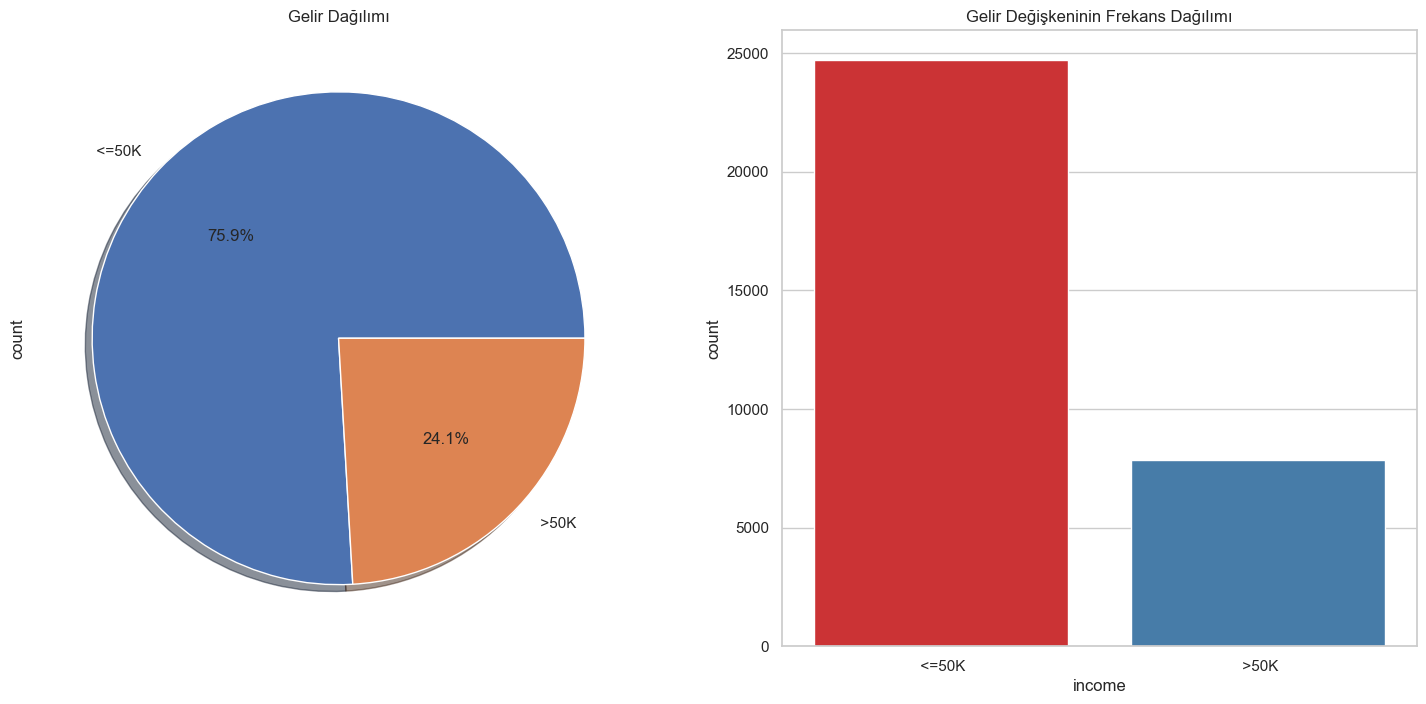

In [23]:
# değerlerin frekans dağılımının yüzdesini görüntüleme

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['income'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Gelir Dağılımı')

sns.countplot(x="income", data=df, palette="Set1", ax=ax[1])
ax[1].set_title("Gelir Değişkeninin Frekans Dağılımı")

plt.show()

Çubukları aşağıdaki gibi yatay olarak çizebiliriz: -

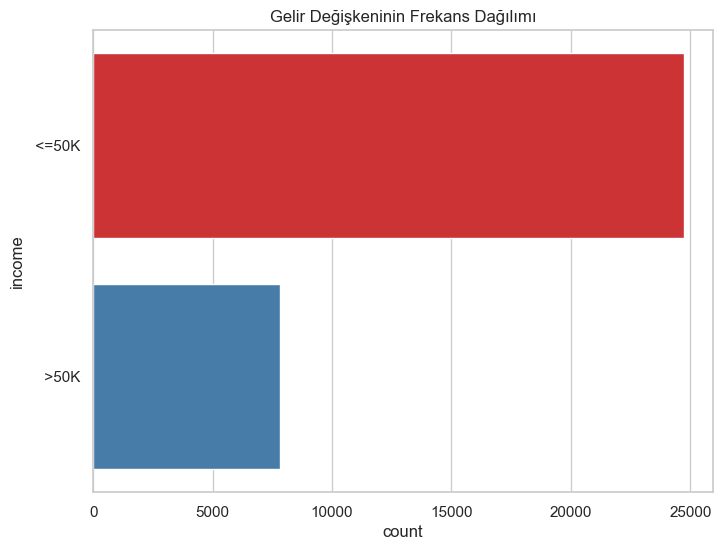

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y="income", data=df, palette="Set1")
ax.set_title("Gelir Değişkeninin Frekans Dağılımı")
plt.show()

#### `gelir` Değişkenini `cinsiyet` Değişkenine Göre Görselleştirme

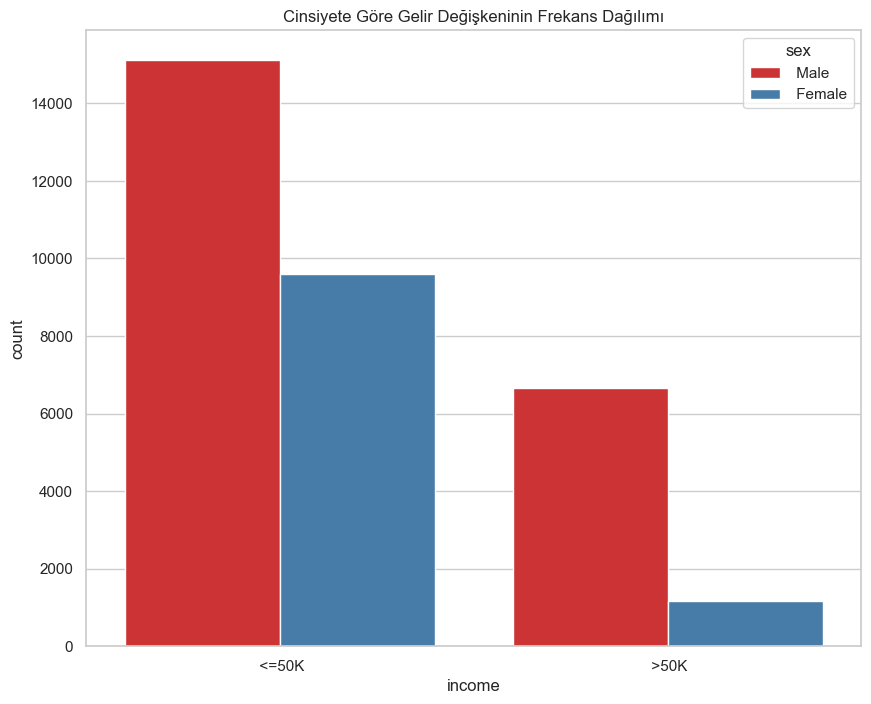

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Cinsiyete Göre Gelir Değişkeninin Frekans Dağılımı")
plt.show()

#### Yorum

- Gelir kategorilerinde de erkeklerin kadınlardan daha fazla para kazandığını görebiliyoruz.

#### `gelir` Değişkenini `ırk` Değişkenine Göre Görselleştirme

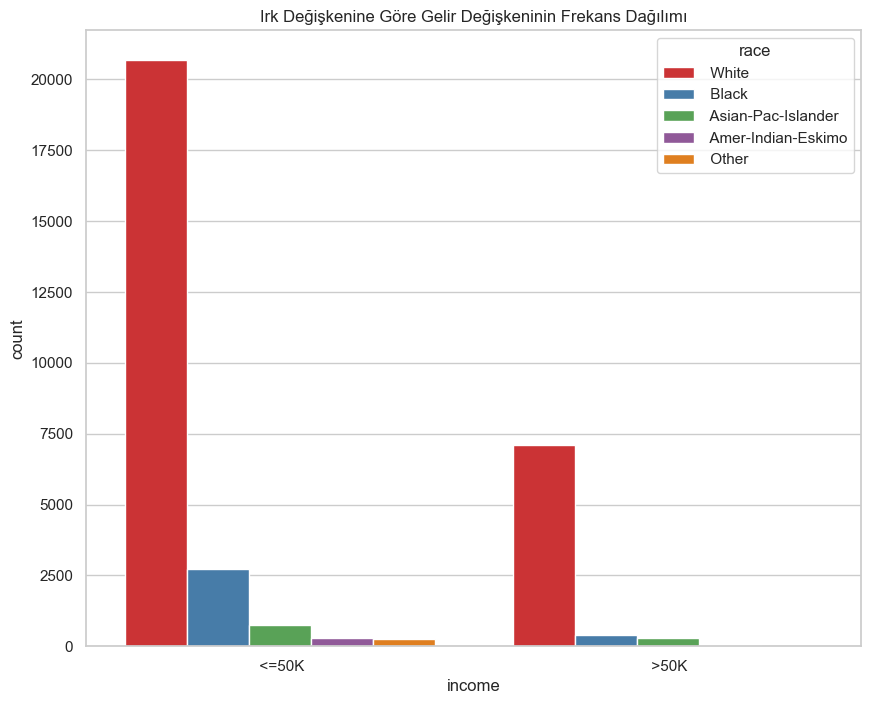

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Irk Değişkenine Göre Gelir Değişkeninin Frekans Dağılımı")
plt.show()


#### Yorum

- Gelir kategorilerinde beyazların, beyaz olmayanlardan daha fazla para kazandığını görebiliriz.

#### workclass Değişkenini İnceleme

In [27]:
# Farklı etiketlerin sayısını kontrol et
df.workclass.nunique()

9

In [28]:
# Farklı etiketleri görüntüle
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [29]:
# Değerlerin frekans dağılımını görüntüle
df.workclass.value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

We can see that there are 1836 values encoded as `?` in workclass variable. I will replace these `?` with `NaN`.

In [30]:
# 'workclass' değişkenindeki '?' değerlerini 'NaN' ile değiştir

df['workclass'].replace(' ?', np.NaN, inplace=True)

In [31]:
# 'workclass' değişkenindeki değerlerin frekans dağılımını tekrar kontrol et

df.workclass.value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

- Şimdi, `workclass` değişkeninde `?` olarak kodlanmış değerlerin olmadığını görebiliyoruz.

- Benzer bir yaklaşımı `occupation` ve `native_country` sütunları için uygulayacazım.

#### `workclass` değişkenini görselleştir

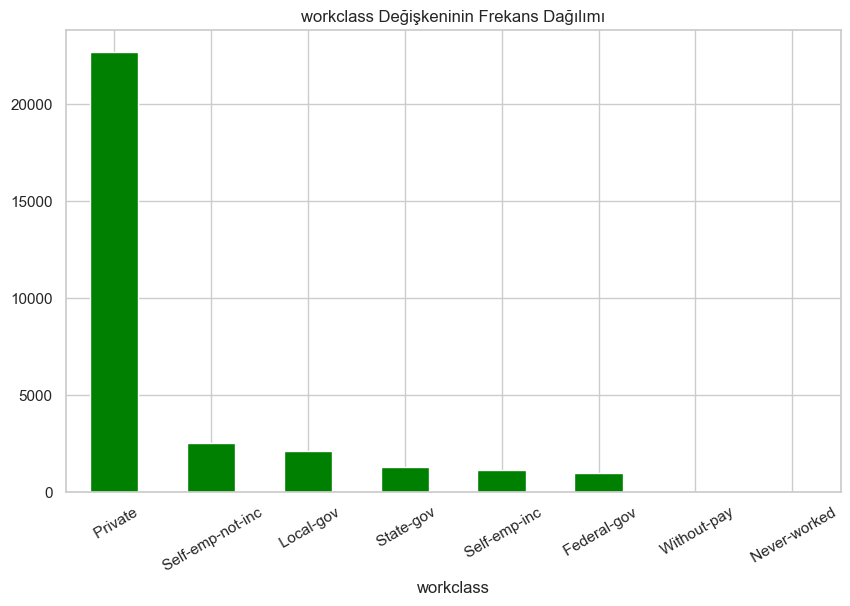

In [32]:
# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(10, 6))

# Çubuk grafiği çiz
ax = df.workclass.value_counts().plot(kind="bar", color="green")

# Grafiğin başlığını ayarla
ax.set_title("workclass Değişkeninin Frekans Dağılımı")

# X eksenindeki etiketlerin dönüşünü ayarla
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)

# Grafiği göster
plt.show()

#### Yorum

- Diğer işçi kategorilerine göre özel sektör çalışanlarının çok daha fazla olduğunu görebiliyoruz.

#### `workclass` değişkenini `income` değişkenine göre görselleştir

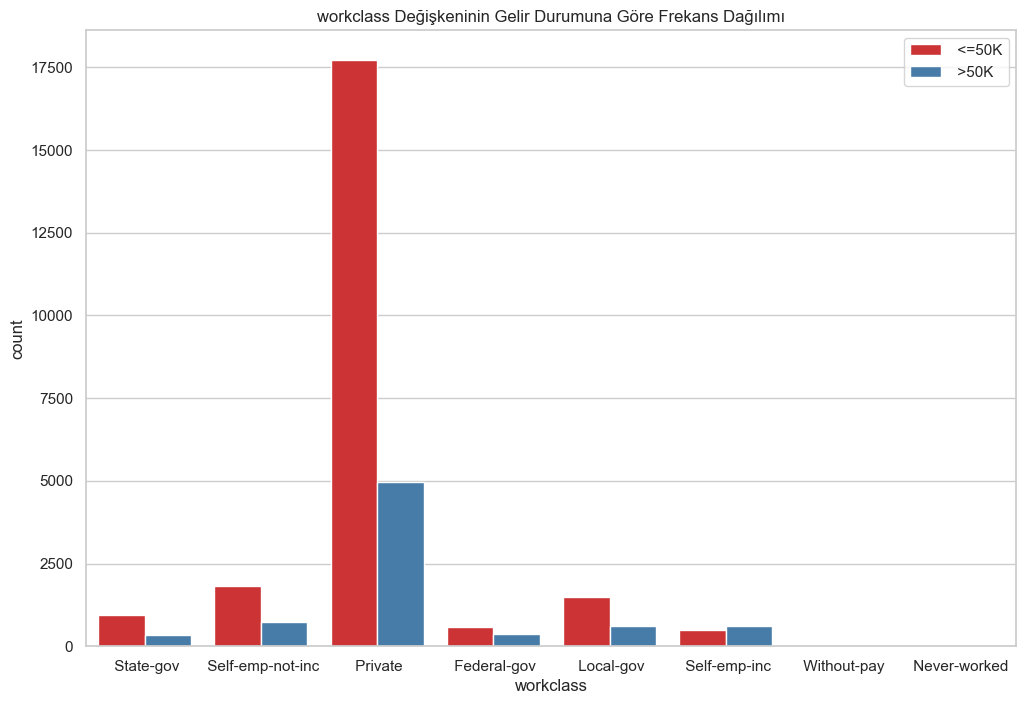

In [33]:
# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(12, 8))

# Seaborn countplot'u çiz
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")

# Grafiğin başlığını ayarla
ax.set_title("workclass Değişkeninin Gelir Durumuna Göre Frekans Dağılımı")

# Legendi sağ üst köşeye yerleştir
ax.legend(loc='upper right')

# Grafiği göster
plt.show()

#### Yorum

- Çoğu iş kategorisinde çalışanların geliri 50 bin dolardan az veya ona eşittir.

- Ancak bu trend, özel sektör `workclass` kategorisinde daha belirgin görünmektedir.

####  `workclass` değişkenini `cinsiyet` değişkeniyle görselleştir

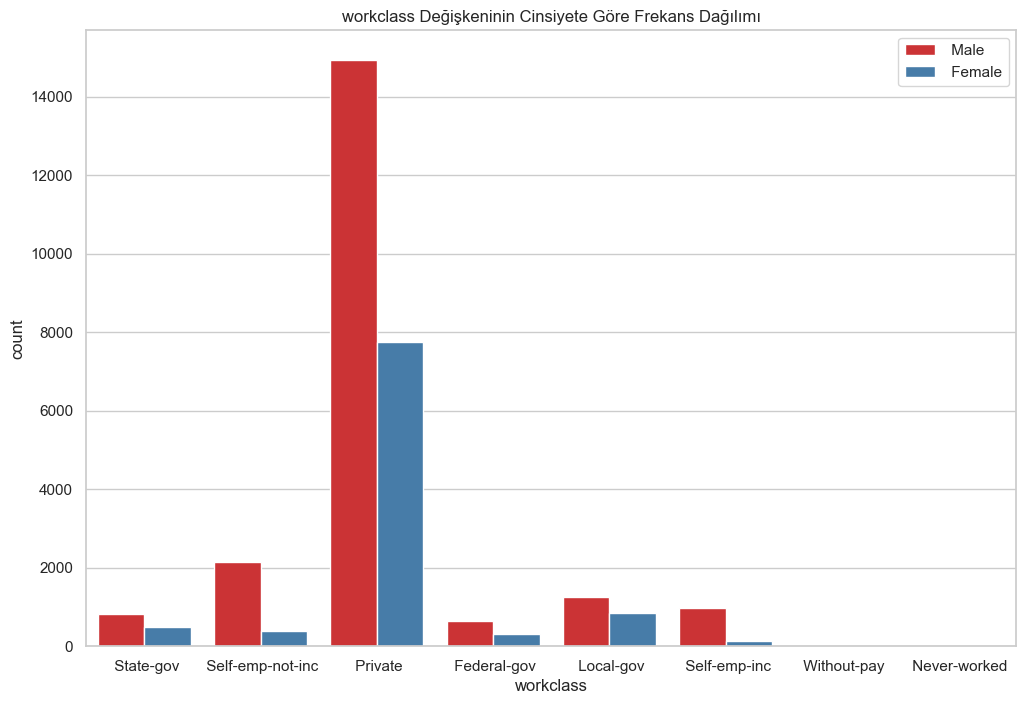

In [34]:
# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(12, 8))

# Seaborn countplot'u çiz
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set1")

# Grafiğin başlığını ayarla
ax.set_title("workclass Değişkeninin Cinsiyete Göre Frekans Dağılımı")

# Legendi sağ üst köşeye yerleştir
ax.legend(loc='upper right')

# Grafiği göster
plt.show()

#### Yorum

- Tüm iş kategorilerinde kadın işçilerden daha fazla erkek işçi olduğunu görebiliyoruz.

- Bu eğilim özel sektörde daha belirgin görünmektedir.

#### `occupation` Değişkenini İnceleme


In [35]:
# Farklı etiketlerin sayısını kontrol et

df.occupation.nunique()

15

In [36]:
# Farklı etiketleri görüntüle
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [37]:
# Değerlerin frekans dağılımını görüntüle
df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

`occupation` değişkeninde 1843 değerin `?` olarak kodlandığını görebiliyoruz. Bu `?` değerlerini `NaN` ile değiştireceğim.


In [38]:
# 'occupation' değişkenindeki '?' değerlerini 'NaN' ile değiştir

df['occupation'].replace(' ?', np.NaN, inplace=True)


In [39]:
# Tekrar 'occupation' değişkeninin frekans dağılımını kontrol et
df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

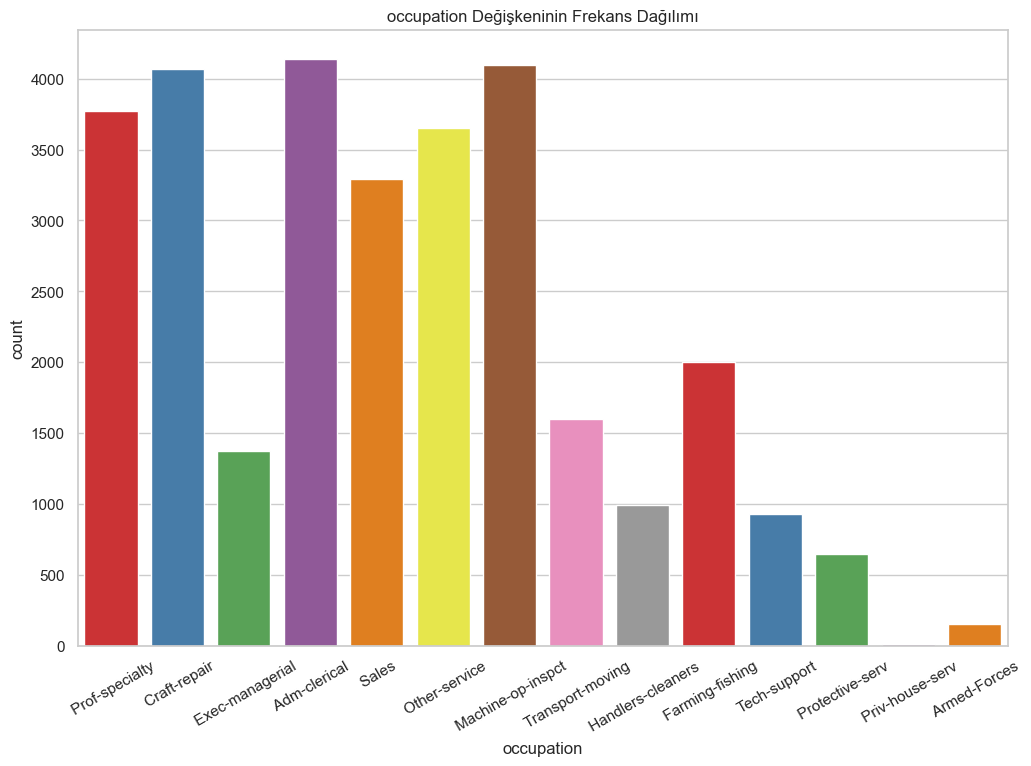

In [40]:
# occupation değişkeninin frekans dağılımını görselleştirelim

# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(12, 8))

# Seaborn countplot'u çiz
ax = sns.countplot(x="occupation", data=df, palette="Set1")

# Grafiğin başlığını ayarla
ax.set_title("occupation Değişkeninin Frekans Dağılımı")

# X eksenindeki etiketlerin dönüşünü ayarla
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)

# Grafiği göster
plt.show()

#### `native_country` Değişkenini İnceleme

In [41]:
# Farklı etiketlerin sayısını kontrol et

df.native_country.nunique()

42

In [42]:
# Farklı etiketleri görelim

df.native_country.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [43]:
# Değerlerin frekans dağılımını görüntüle
df.native_country.value_counts()


native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

`native_country` değişkeninde 583 değerin `?` olarak kodlandığını görebiliyoruz. Bu `?` değerlerini `NaN` ile değiştireceğim.

In [44]:
# 'native_country' değişkenindeki '?' değerlerini 'NaN' ile değiştir

df['native_country'].replace(' ?', np.NaN, inplace=True)

In [45]:
# Tekrar 'native_country' değişkeninin frekans dağılımını kontrol et

df.native_country.value_counts()

native_country
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                

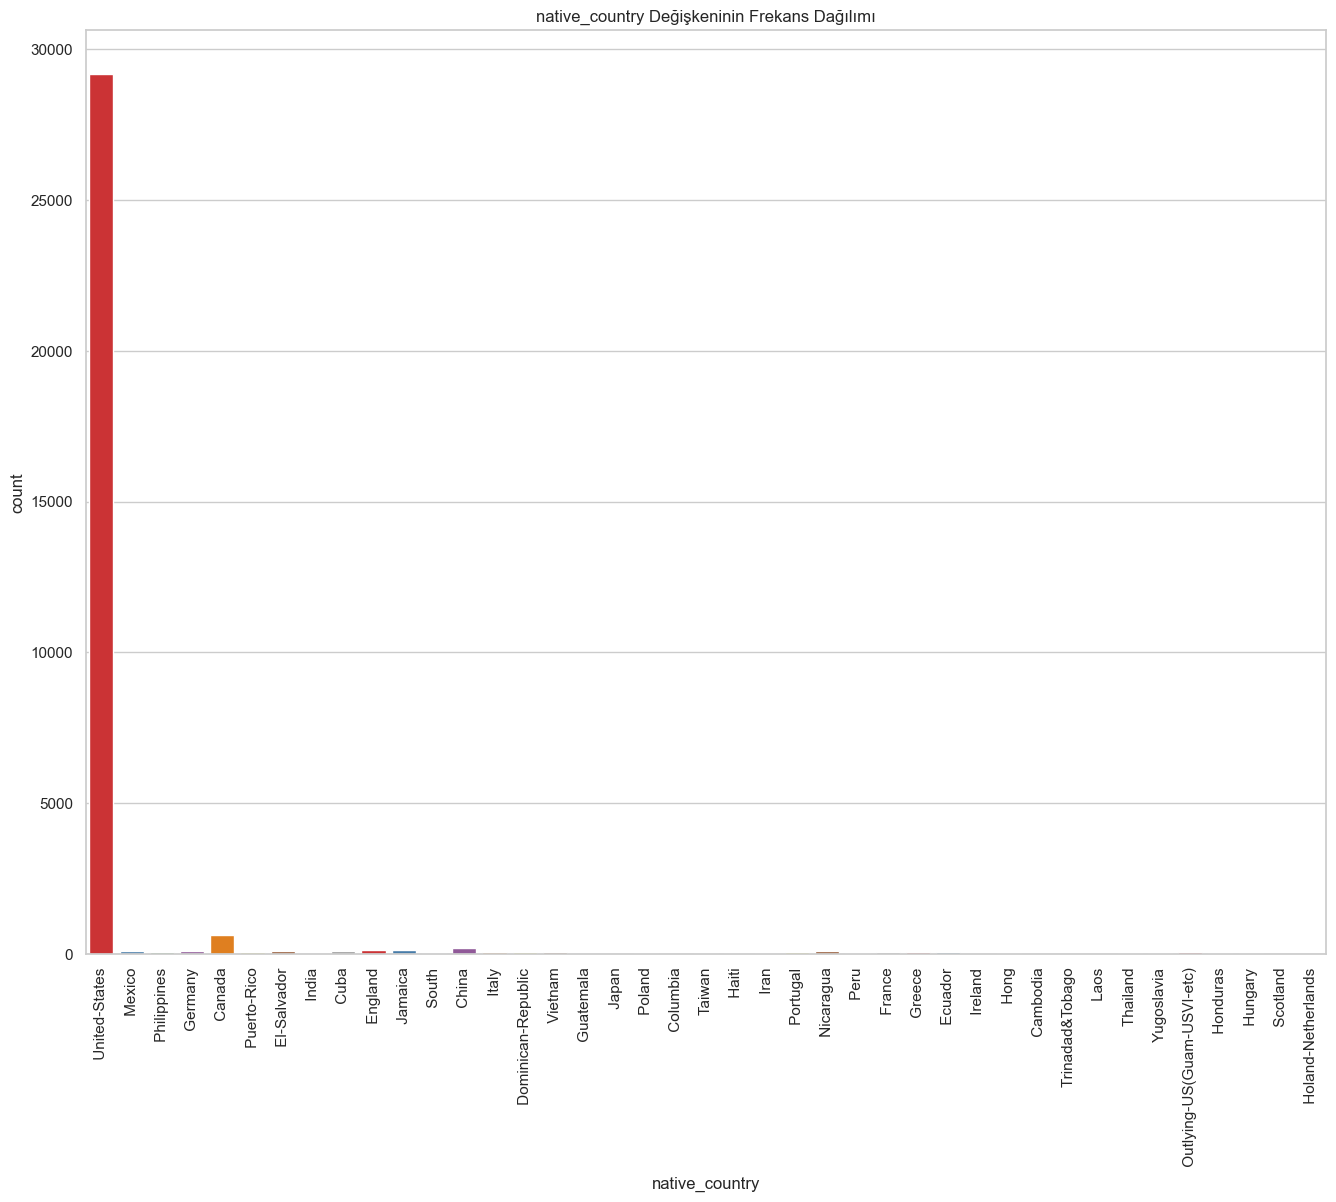

In [46]:
# `native_country` değişkeninin frekans dağılımını görselleştirelim

# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(16, 12))

# Seaborn countplot'u çiz
ax = sns.countplot(x="native_country", data=df, palette="Set1")

# Grafiğin başlığını ayarla
ax.set_title("native_country Değişkeninin Frekans Dağılımı")

# X eksenindeki etiketlerin dönüşünü ayarla
ax.set_xticklabels(df.native_country.value_counts().index, rotation=90)

# Grafiği göster
plt.show()

`native_country` değişkeni içerisinde `United-States`'in baskın olduğunu görebiliyoruz.

### 4.7 Kategorik değişkenlerdeki eksik değerleri kontrol et


In [47]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Şimdi, `workclass`, `occupation` ve `native_country` değişkenlerinde eksik değerler olduğunu görebiliyoruz.

In [48]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


## 5. Sayısal Değişkenleri İnceleme

### 5.1 Sayısal Değişkenleri Bulma

In [49]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Toplam {} sayısal değişken bulunmaktadır\n'.format(len(numerical)))

print('Sayısal değişkenler :\n\n', numerical)

Toplam 6 sayısal değişken bulunmaktadır

Sayısal değişkenler :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


### 5.2 Sayısal Değişkenlere Önizleme

In [50]:
df[numerical].head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

### 5.3 Sayısal Değişkenlerin Özeti

- Toplam 6 sayısal değişken bulunmaktadır.

- Bunlar `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` ve `hours_per_week` olarak verilmiştir.

- Tüm sayısal değişkenler kesikli veri tipindedir.

### 5.4 Sayısal Değişkenlerde Eksik Değerleri Kontrol Etme

In [51]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Sayısal değişkenlerde eksik değer olmadığını görebiliyoruz.

### 5.5 Sayısal Değişkenleri İnceleme

#### `age` Değişkenini İnceleme

In [52]:
df['age'].nunique()

73

#### `age` Değişkeninin Dağılımını Görüntüleme

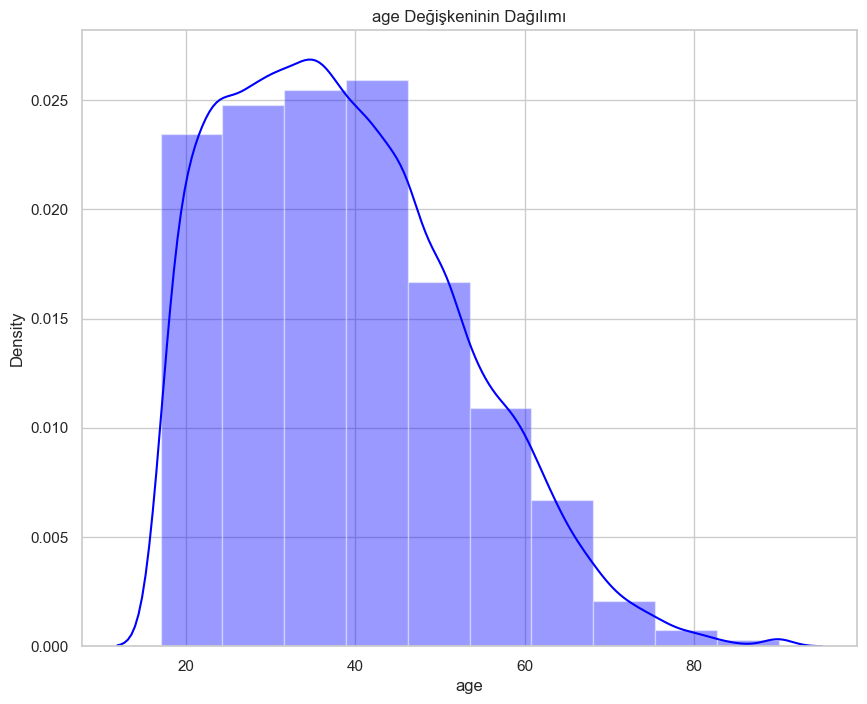

In [53]:
# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(10, 8))

# Seaborn distplot'u çiz
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')

# Grafiğin başlığını ayarla
ax.set_title("age Değişkeninin Dağılımı")

# Grafiği göster
plt.show()

`age` değişkeninin hafifçe pozitif (sağ) çarpık olduğunu görebiliyoruz.

#### `age` Değişkeninde Aykırı Değerleri Boxplot ile Algılama

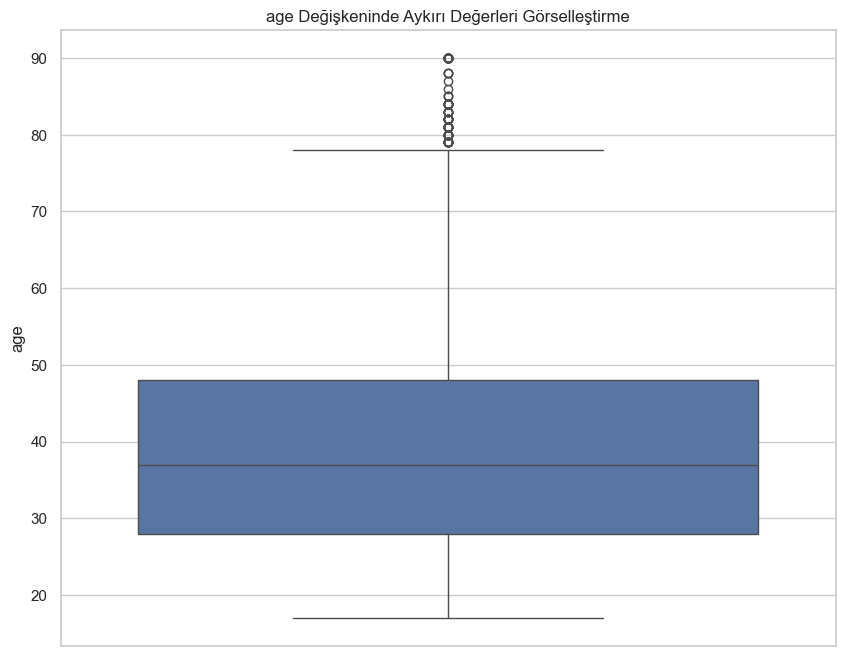

In [54]:

# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(10, 8))

# Seaborn boxplot'u çiz
x = df['age']
ax = sns.boxplot(x)

# Grafiğin başlığını ayarla
ax.set_title("age Değişkeninde Aykırı Değerleri Görselleştirme")

# Grafiği göster
plt.show()

`age` değişkeninde çok sayıda aykırı değer olduğunu görebiliyoruz.

#### `age` ve `income` Değişkenleri Arasındaki İlişkiyi İnceleme

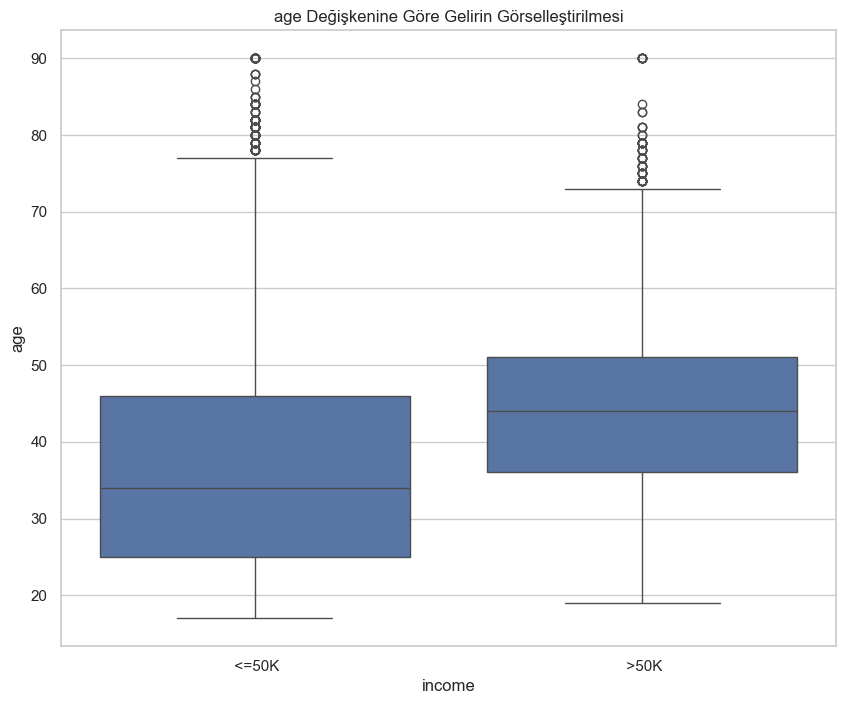

In [55]:

# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(10, 8))

# Seaborn boxplot'u çiz
ax = sns.boxplot(x="income", y="age", data=df)

# Grafiğin başlığını ayarla
ax.set_title("age Değişkenine Göre Gelirin Görselleştirilmesi")

# Grafiği göster
plt.show()

#### Yorum

- Genç insanlar daha az para kazanmaktadırlar.

#### `age` ve `cinsiyet` değişkenlerine göre `gelir`in görselleştirilmesi

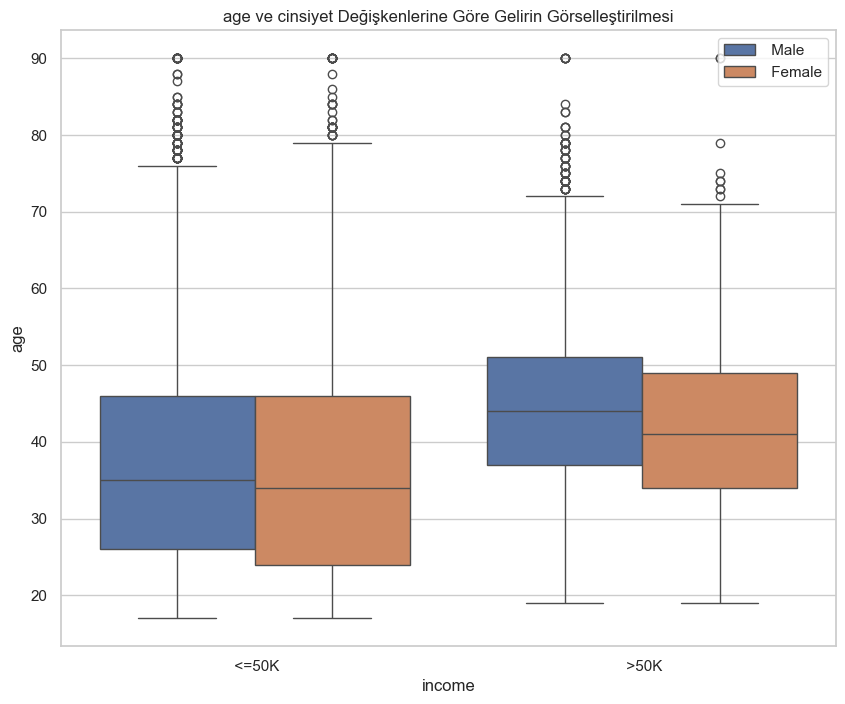

In [56]:
# Figür ve eksen oluştur
f, ax = plt.subplots(figsize=(10, 8))

# Seaborn boxplot'u çiz
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)

# Grafiğin başlığını ayarla
ax.set_title("age ve cinsiyet Değişkenlerine Göre Gelirin Görselleştirilmesi")

# Legendi sağ üst köşeye yerleştir
ax.legend(loc='upper right')

# Grafiği göster
plt.show()


#### `ırk` ve `yaş` arasındaki ilişkinin görselleştirilmesi

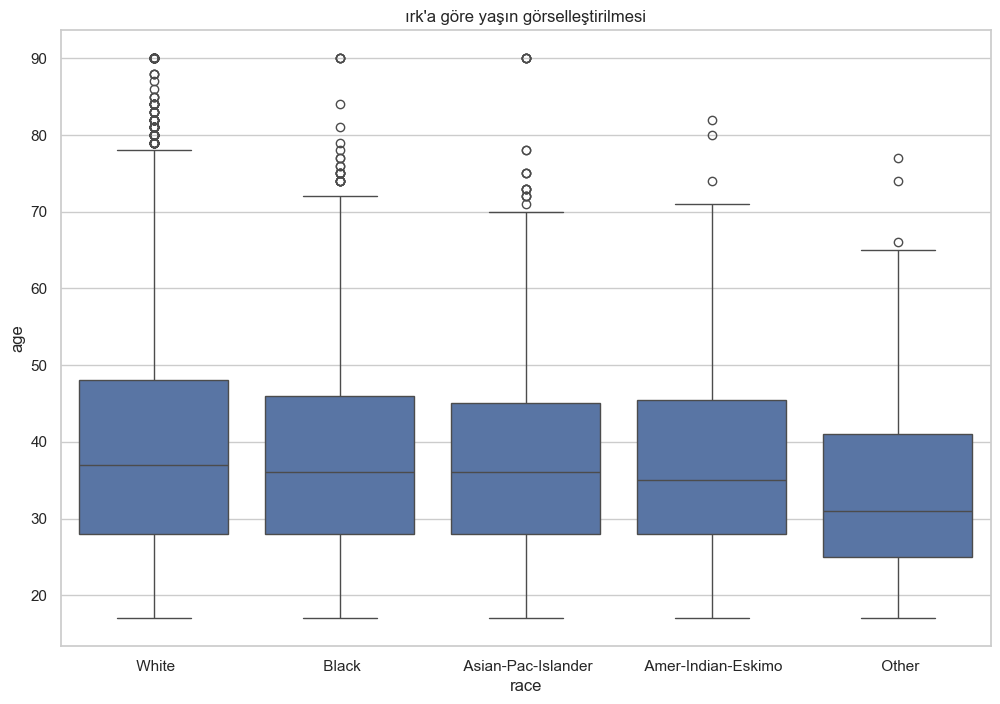

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = df)
plt.title("ırk'a göre yaşın görselleştirilmesi")
plt.show()

#### Yorum

- Beyazlar, diğer insan gruplarından daha yaşlıdır.

#### Korelasyonları bulalım

In [58]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot correlation heatmap
correlation_matrix.style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

#### Yorum

- Değişkenler arasında güçlü bir korelasyon olmadığını görebiliyoruz.

#### Veri setindeki ikili ilişkileri çizelim:


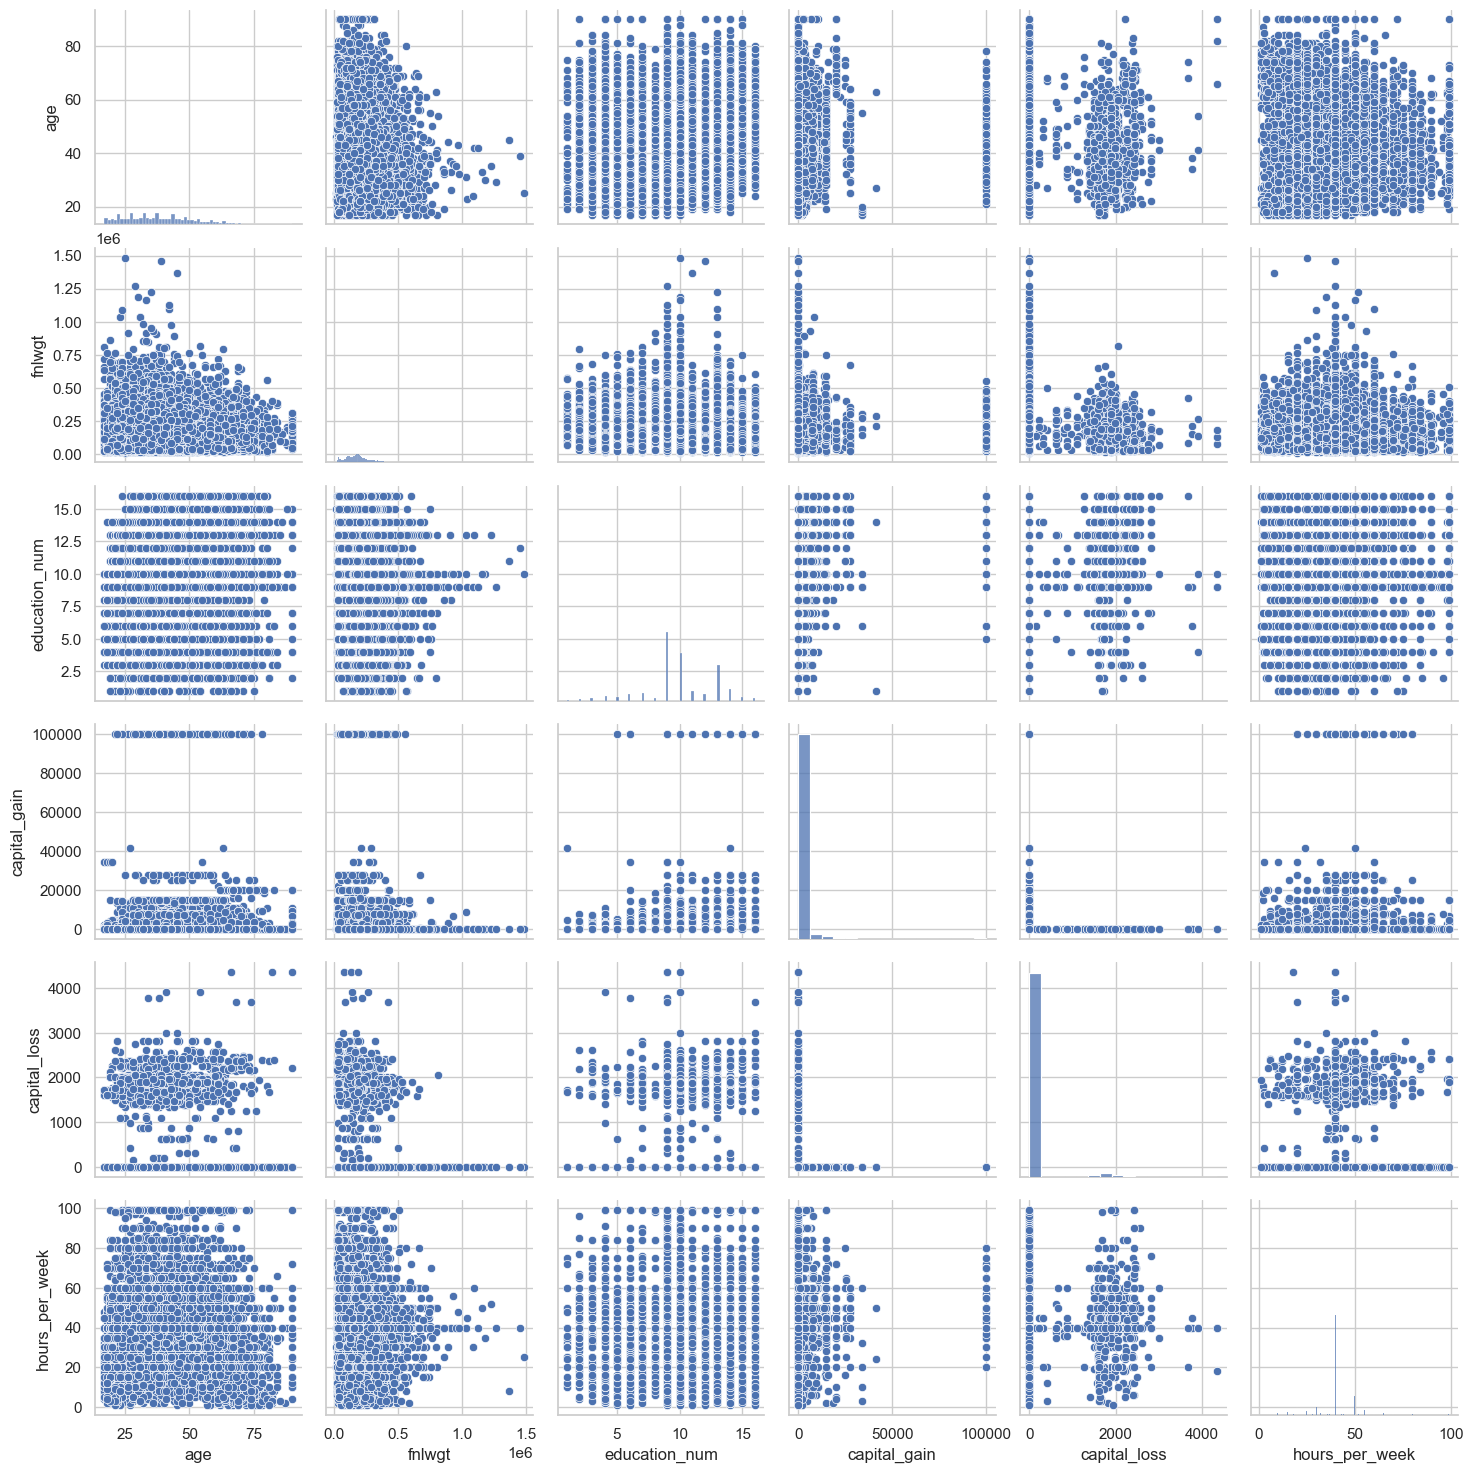

In [59]:
sns.pairplot(df)
plt.show()

#### Yorum

- `age` ve `fnlwgt` değişkenlerinibiraz n pozitif çarpık olduğunu görebiliriz.

- `education_num` değişkeni negatif çarpıktır, `hours_per_week` ise normal dağılıma sahiptir.

- `capital_gain` ile `education_num` arasında zayıf pozitif bir korelasyon bulunmaktadır (korelasyon katsayısı=0.1226).

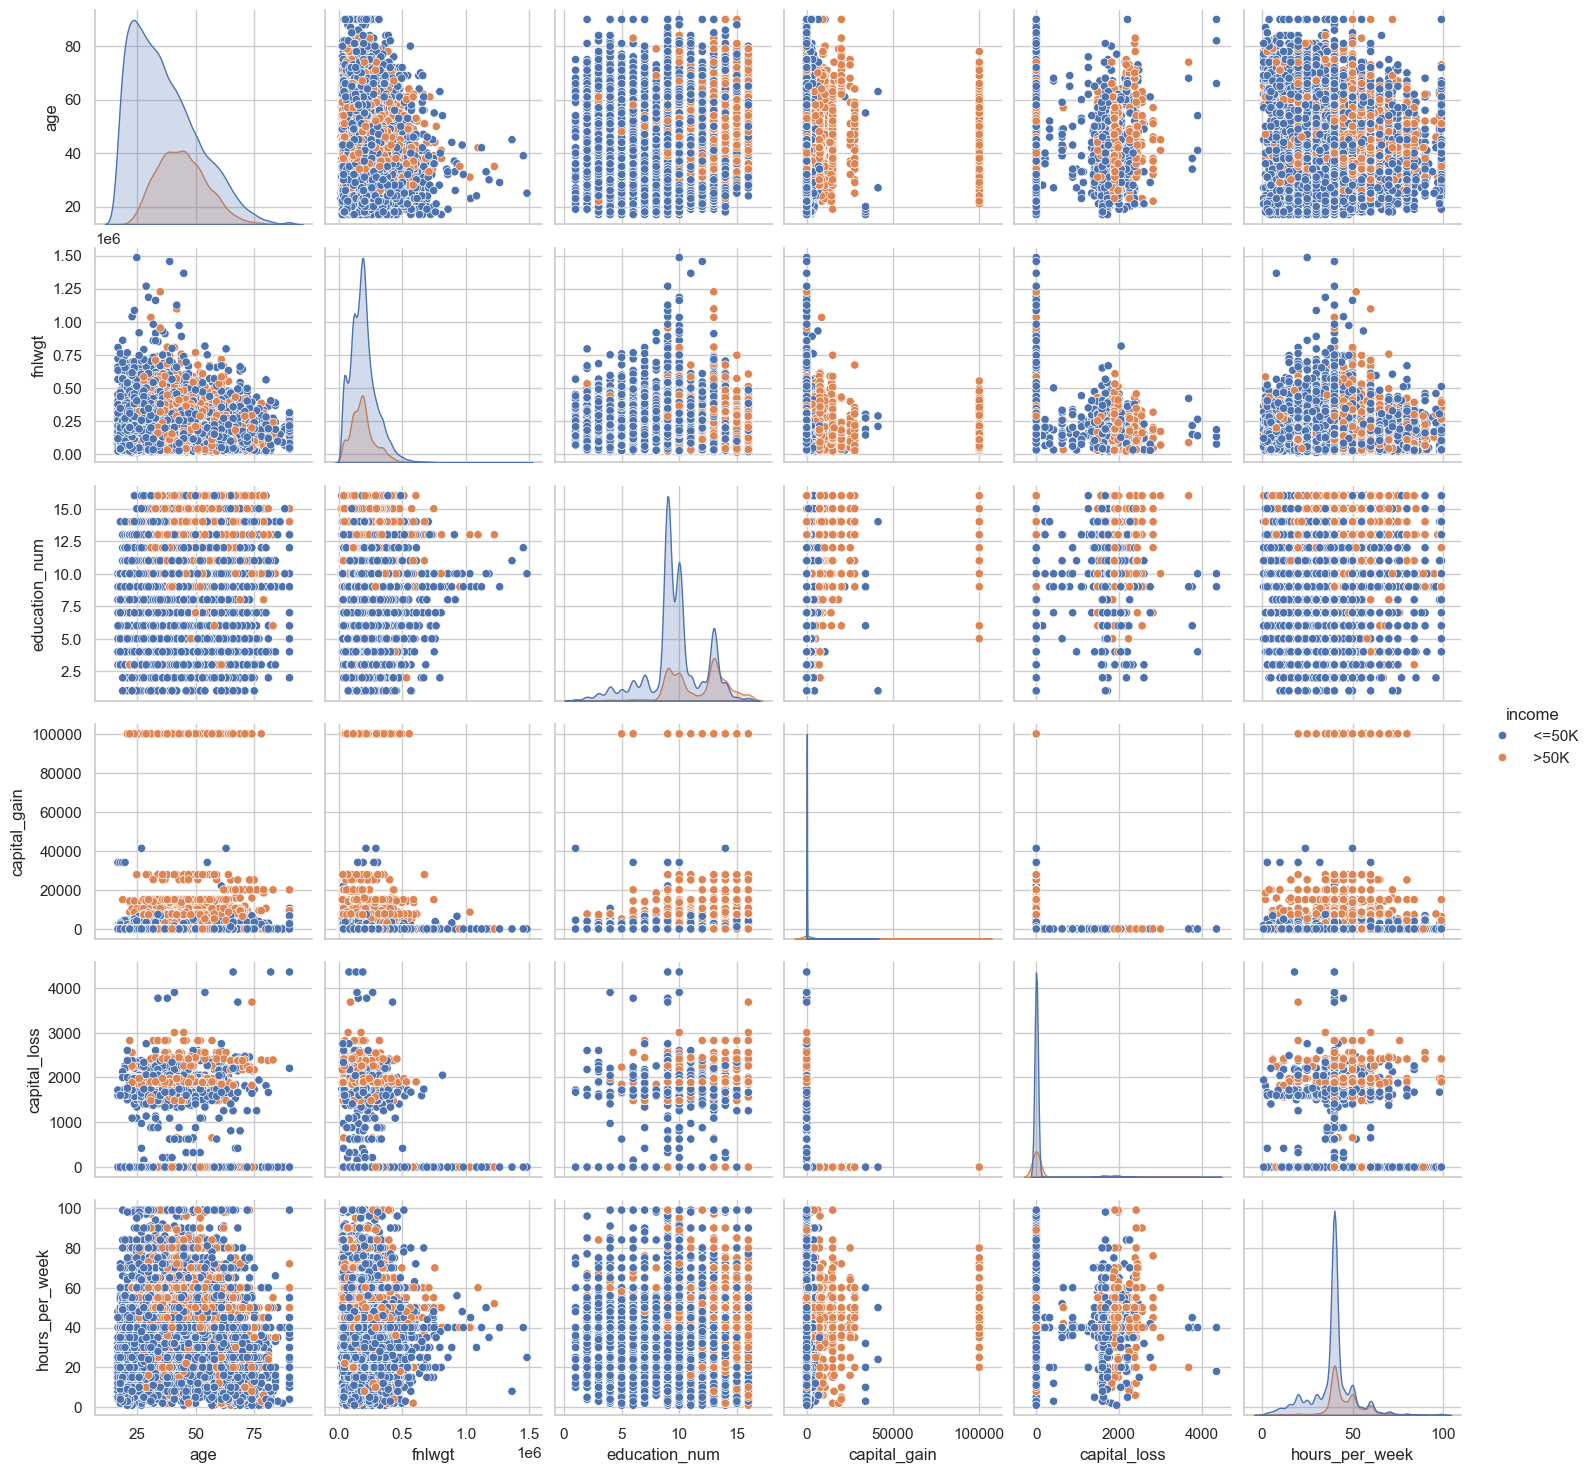

In [60]:
sns.pairplot(df, hue="income")
plt.show()

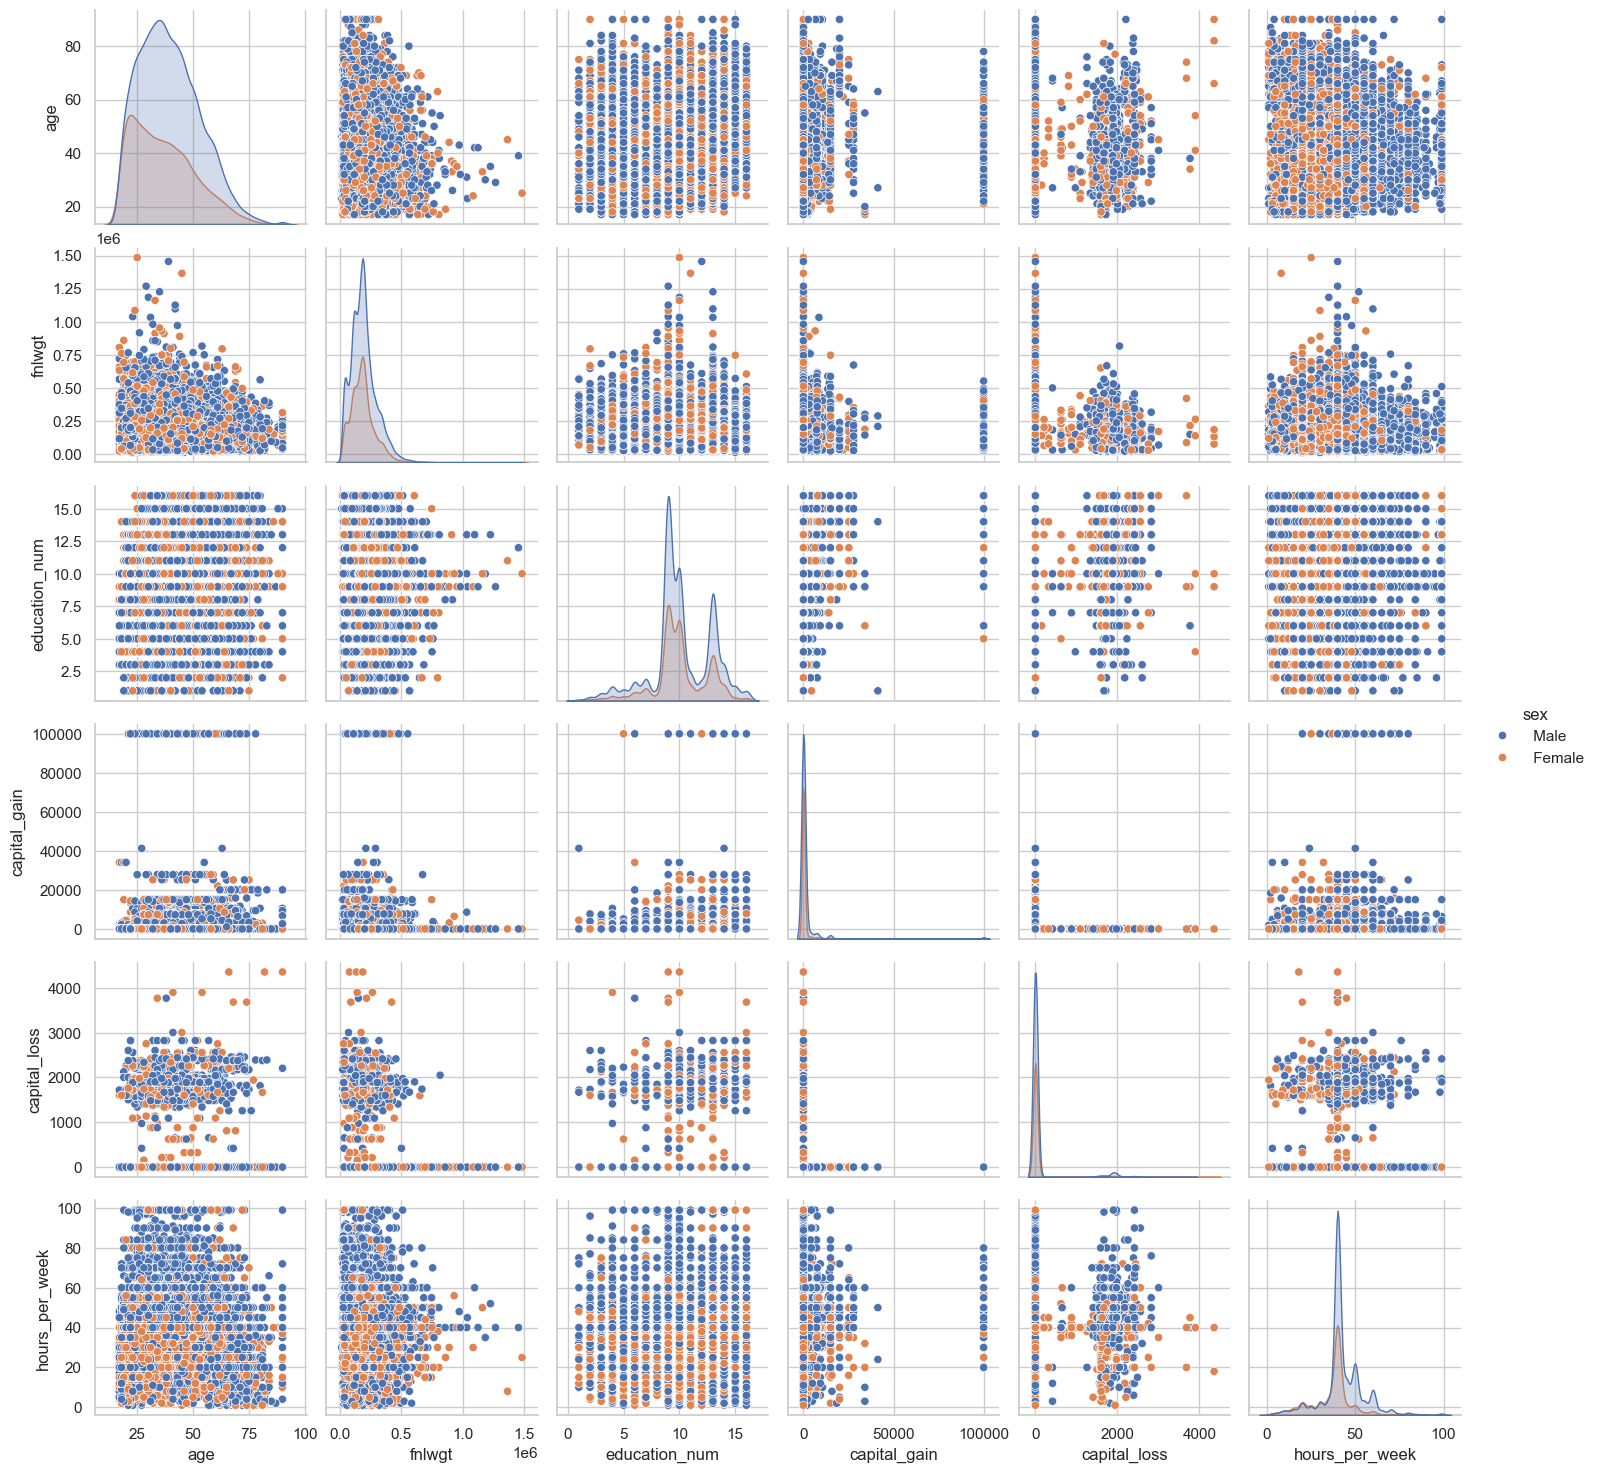

In [61]:
sns.pairplot(df, hue="sex")
plt.show()

## 6. Özellik vektörünü ve hedef değişkeni belirtme

In [62]:
X = df.drop(['income'], axis=1)

y = df['income']

## 7. Veriyi Ayrı Eğitim ve Test Setlerine Bölme

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [64]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((26048, 14), (6513, 14))

## 8. Özellik Mühendisliği

- **Özellik Mühendisliği**, ham verileri modelimizi daha iyi anlamamıza ve tahmin gücünü artırmamıza yardımcı olan faydalı özelliklere dönüştürme sürecidir.

- Farklı tipteki değişkenler üzerinde özellik mühendisliği yapazağım.

- İlk olarak, eğitim setindeki kategorik ve sayısal değişkenleri ayrı ayrı göstezceğim.

### 8.1 Eğitim setindeki kategorik değişkenleri gösterme

In [65]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

### 8.2 Eğitim setindeki sayısal değişkenleri gösterme

In [66]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

## 9.3 Kategorik değişkenlerde eksik değerlerin mühendisliği


In [67]:
# eğitim setindeki kategorik değişkenlerdeki eksik değerlerin yüzdesi
X_train[categorical].isnull().mean()

workclass         0.055974
education         0.000000
marital_status    0.000000
occupation        0.056204
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018312
dtype: float64

In [68]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.05597358722358722
occupation 0.056203931203931204
native_country 0.018312346437346437


In [69]:
# eksik kategorik değişkenleri en sık değere atama
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

In [70]:
# X_train'deki kategorik değişkenlerdeki eksik değerleri kontrol etme
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [71]:
# X_test'teki kategorik değişkenlerdeki eksik değerleri kontrol etme
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

Son kontrol olarak X_train ve X_test'teki eksik değerleri kontrol edeceğim.

In [72]:
# X_train'de eksik değerleri kontrol etme
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [73]:
# X_test'teki eksik değerleri kontrol etme
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

X_train ve X_test'te eksik değer olmadığını görebiliriz.

### 8.4 Kategorik değişkenleri kodlayın

In [74]:
# X_train'de kategorik değişkenlerin ön izlemesi
X_train[categorical].head()

workclass   education       marital_status         occupation  \
15282            Private        11th             Divorced   Transport-moving   
24870            Private     HS-grad        Never-married    Exec-managerial   
18822            Private   Bachelors        Never-married       Adm-clerical   
26404            Private     HS-grad   Married-civ-spouse              Sales   
7842    Self-emp-not-inc   Assoc-voc   Married-civ-spouse     Prof-specialty   

         relationship    race      sex  native_country  
15282   Not-in-family   White     Male   United-States  
24870   Not-in-family   White   Female   United-States  
18822   Not-in-family   White   Female   United-States  
26404            Wife   Black   Female   United-States  
7842          Husband   White     Male   United-States

In [75]:
# import category encoders

import category_encoders as ce

In [76]:
# kategorik değişkenleri one hot encoding ile kodlama
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [77]:
X_train.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
15282   36            1            0            0            0            0   
24870   35            1            0            0            0            0   
18822   38            1            0            0            0            0   
26404   50            1            0            0            0            0   
7842    68            0            1            0            0            0   

       workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_32  \
15282            0            0            0  174308  ...                  0   
24870            0            0            0  198202  ...                  0   
18822            0            0            0   52963  ...                  0   
26404            0            0            0  138270  ...                  0   
7842             0            0            0  116903  ...                  0   

       native_country_33  native_country_34  native_country_35  \
15282                  0                  0                  0   
24870                  0                  0                  0   
18822                  0                  0                  0   
26404                  0                  0                  0   
7842                   0                  0                  0   

       native_country_36  native_country_37  native_country_38  \
15282                  0                  0                  0   
24870                  0                  0                  0   
18822                  0                  0                  0   
26404                  0                  0                  0   
7842                   0                  0                  0   

       native_country_39  native_country_40  native_country_41  
15282                  0                  0                  0  
24870                  0                  0                  0  
18822                  0                  0                  0  
26404                  0                  0                  0  
7842                   0                  0                  0  

[5 rows x 105 columns]

In [78]:
X_train.shape

(26048, 105)

İlk 14 sütundan itibaren eğitim setimizde artık 105 sütun bulunduğunu görebiliriz.

Benzer şekilde X_test setine de bir göz atacağız.

In [79]:
X_test.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
22278   27            1            0            0            0            0   
8950    27            1            0            0            0            0   
7838    25            1            0            0            0            0   
16505   46            1            0            0            0            0   
19140   45            1            0            0            0            0   

       workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_32  \
22278            0            0            0  177119  ...                  0   
8950             0            0            0  216481  ...                  0   
7838             0            0            0  256263  ...                  0   
16505            0            0            0  147640  ...                  0   
19140            0            0            0  172822  ...                  0   

       native_country_33  native_country_34  native_country_35  \
22278                  0                  0                  0   
8950                   0                  0                  0   
7838                   0                  0                  0   
16505                  0                  0                  0   
19140                  0                  0                  0   

       native_country_36  native_country_37  native_country_38  \
22278                  0                  0                  0   
8950                   0                  0                  0   
7838                   0                  0                  0   
16505                  0                  0                  0   
19140                  0                  0                  0   

       native_country_39  native_country_40  native_country_41  
22278                  0                  0                  0  
8950                   0                  0                  0  
7838                   0                  0                  0  
16505                  0                  0                  0  
19140                  0                  0                  0  

[5 rows x 105 columns]

In [80]:
X_test.shape

(6513, 105)

* Artık model oluşturmaya hazır eğitim ve test setimiz var. Bundan önce tüm özellik değişkenlerini aynı ölçeğe atamalıyız. Buna **özellik ölçeklendirme** denir. Bunu aşağıdaki gibi yapacağız.

## 9. Feature Scaling (Özellik Ölçeklendirme)

In [81]:
cols = X_train.columns

In [82]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [83]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [84]:
X_test = pd.DataFrame(X_test, columns=[cols])

Artık Random Forest Sınıflandırıcısında eğitilmeye hazır X_train veri kümemiz var.

### 9.1 SMOT Veriyi Dengele

In [85]:
income_counts = df['income'].value_counts()
income_counts

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [87]:
balanced_df = pd.concat([X_train, y_train], axis=1)
balanced_df['income'].value_counts()

income
 <=50K    19802
 >50K     19802
Name: count, dtype: int64

## 10. Random Forest Classifier Model

In [88]:
# Rastgele Orman Sınıflandırıcısını içe aktar
from sklearn.ensemble import RandomForestClassifier

# Sınıflandırıcıyı örneklendir
rfc = RandomForestClassifier(n_estimators=5,random_state=0)

# Modeli eğit
rfc.fit(X_train, y_train)

# Test seti sonuçlarını tahmin et
y_pred = rfc.predict(X_test)

# Doğruluk skorunu kontrol et
from sklearn.metrics import accuracy_score

print('5 karar ağacı ile model doğruluk skoru: {0:0.6f}'. format(accuracy_score(y_test, y_pred)))

5 karar ağacı ile model doğruluk skoru: 0.828190


In [89]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('100 karar ağacı ile model doğruluk skoru: {0:0.6f}'. format(accuracy_score(y_test, y_pred_100)))

100 karar ağacı ile model doğruluk skoru: 0.844158


## 11. Önemli Özelliklerin Belirlenmesi

In [90]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Şimdi özelliklerin önem puanlarını görmek için feature importance değişkenini kullanacağız.

In [91]:
# özellik puanlarını görüntüle
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

age                  1.407018e-01
fnlwgt               1.080278e-01
marital_status_3     7.953602e-02
hours_per_week       7.581314e-02
capital_gain         5.506484e-02
                         ...     
native_country_36    1.192994e-05
occupation_14        7.026719e-06
workclass_7          6.890892e-06
native_country_38    2.236105e-06
native_country_41    1.561034e-08
Length: 105, dtype: float64

En önemli özelliğin `age`, en az önemli özelliğin ise `native_country_41` olduğunu görüyoruz.

## 12. Özelliklerin özellik puanlarını görselleştirin

Şimdi özellik puanlarını matplotlib ve seaborn ile görselleştireczğim.

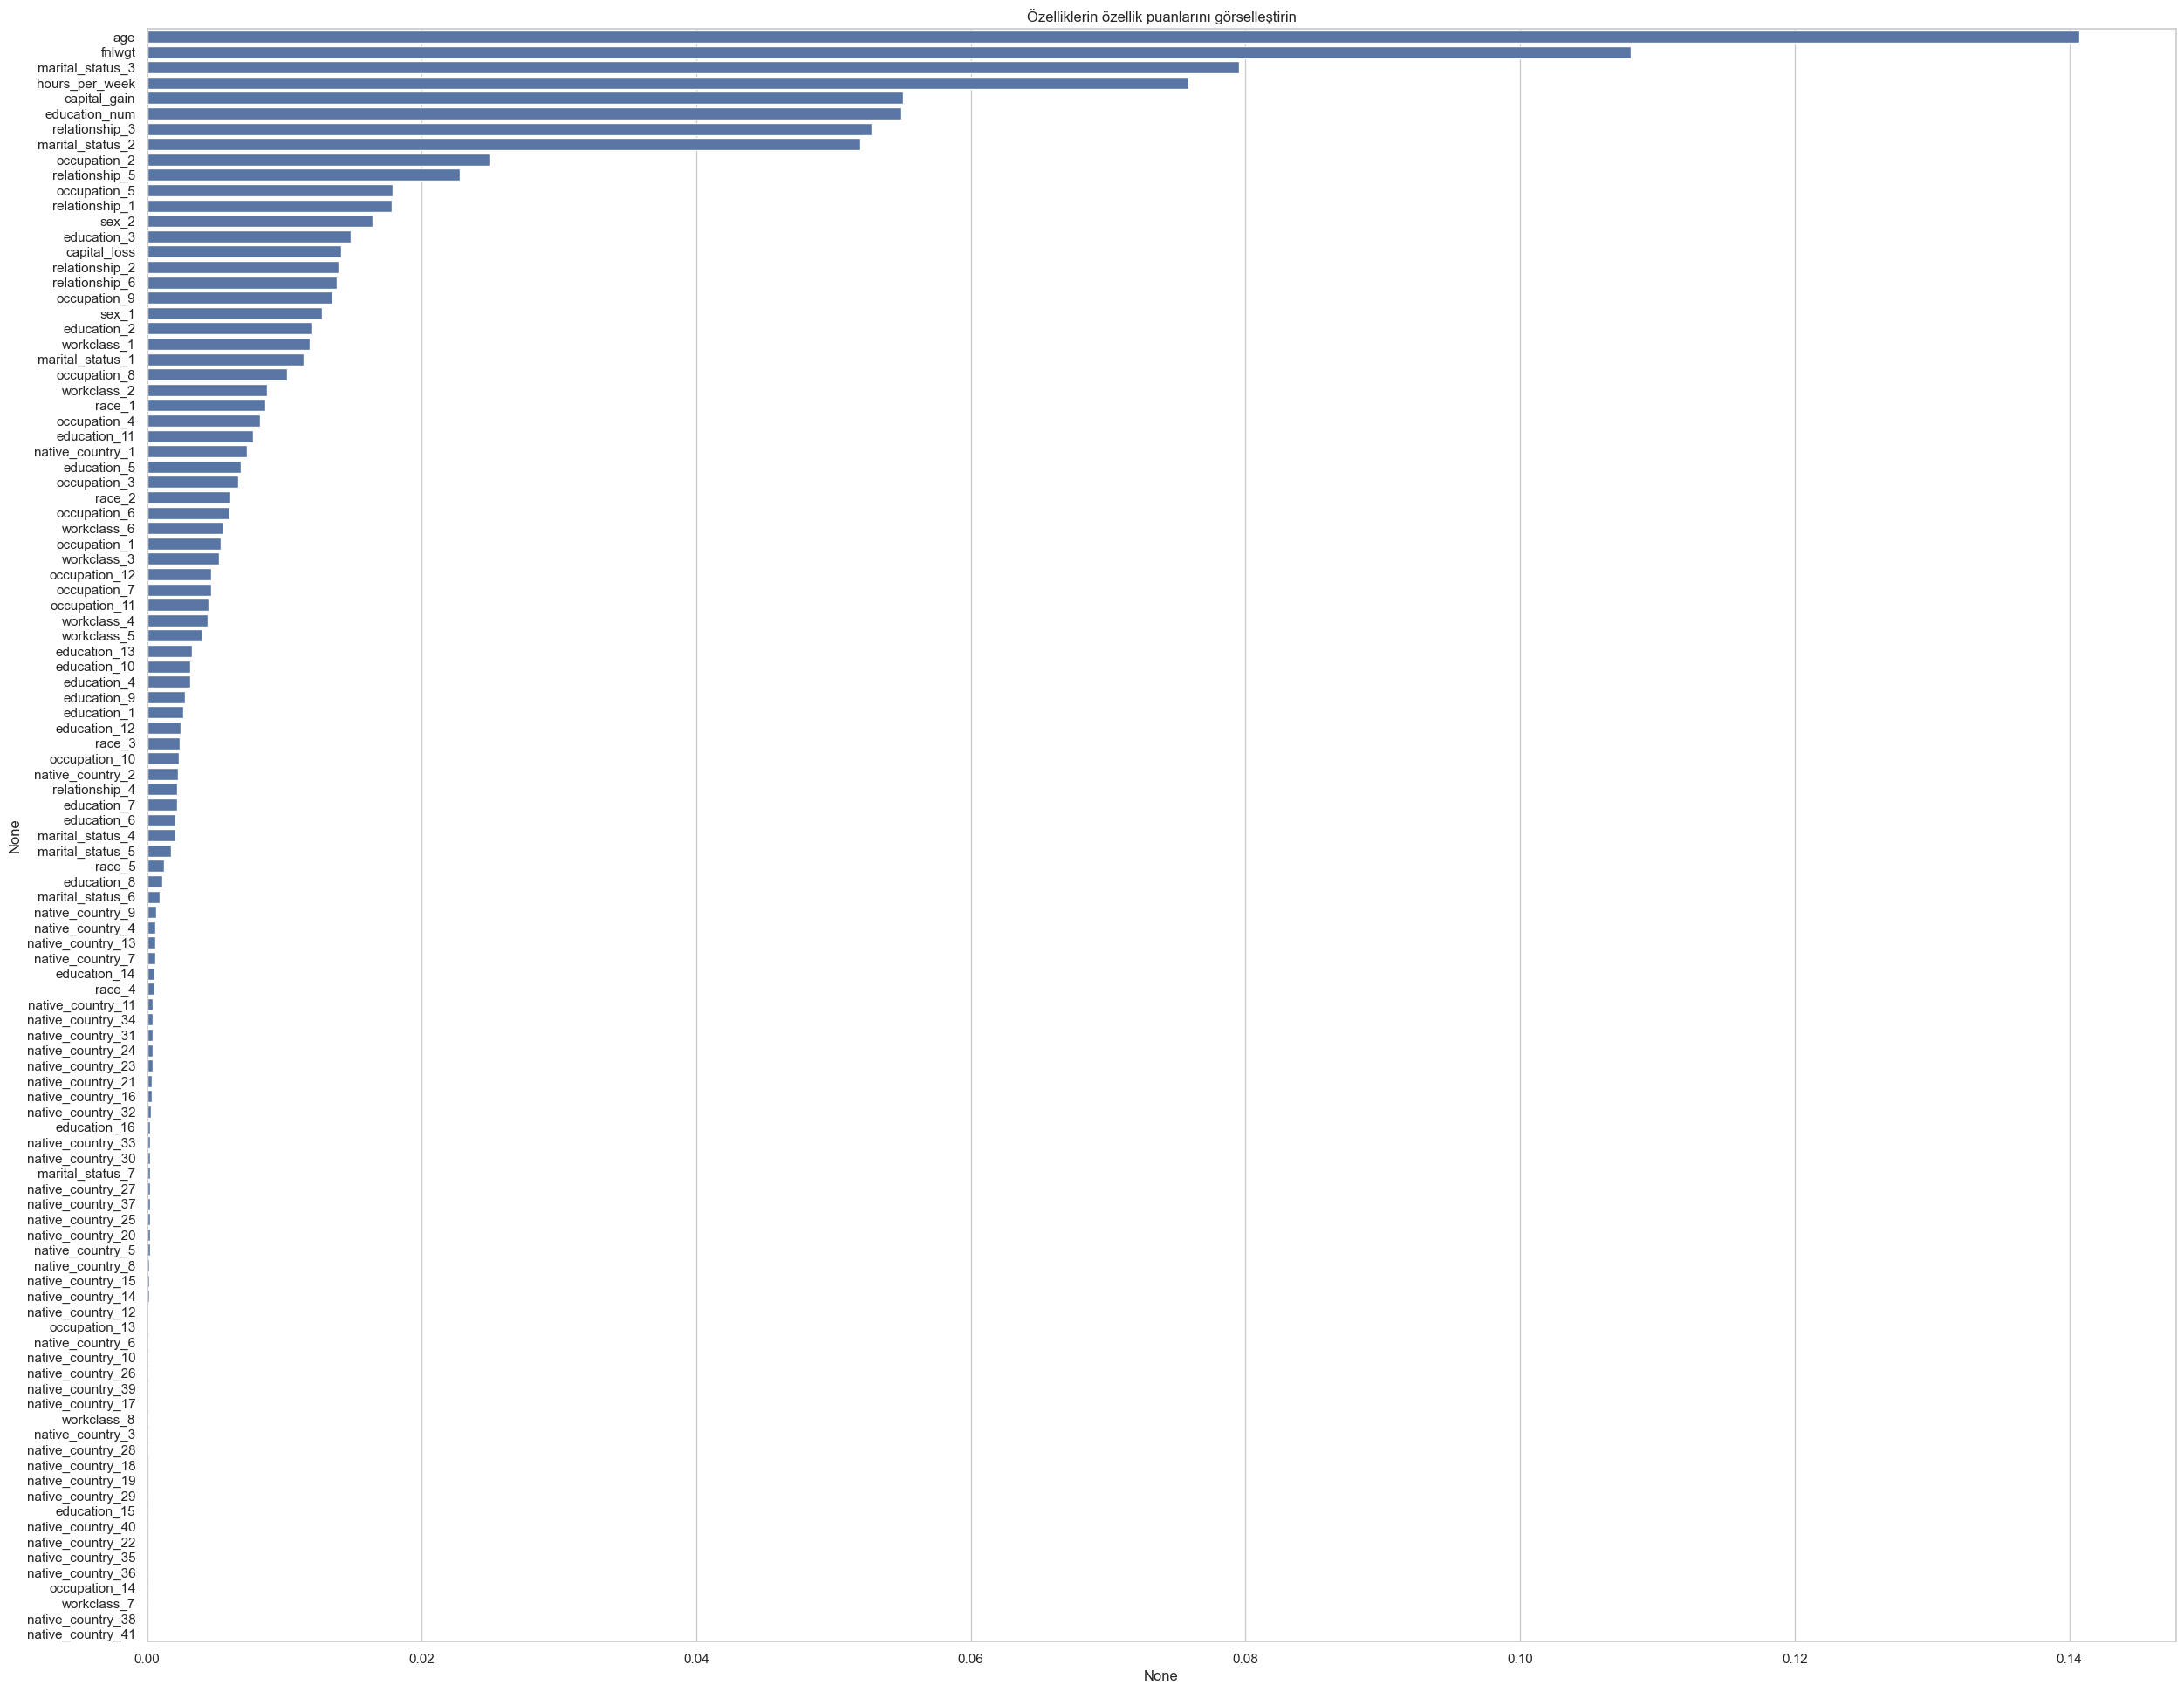

In [92]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index.get_level_values(0))
ax.set_title("Özelliklerin özellik puanlarını görselleştirin")
ax.set_yticklabels(feature_scores.index.get_level_values(0))
plt.show()

## 13. Confusion Matrix (Karışıklık Matrisi)

Confusion Matrix, bir sınıflandırma algoritmasının performansını özetleyen bir araçtır. Bir Confusion Matrix bize, sınıflandırma modelinin performansı ve model tarafından üretilen hata türleri hakkında net bir resim sunar. Her kategoriye göre ayrılmış doğru ve yanlış tahminlerin bir özetini verir. Özet, tablo formunda temsil edilir.

Bir sınıflandırma modelinin performansını değerlendirirken dört tür sonuç mümkündür. Bu dört sonuç aşağıda açıklanmıştır:

**Doğru Pozitif (TP)** - Bir gözlemin belirli bir sınıfa ait olduğunu tahmin ettiğimizde ve gözlem aslında o sınıfa ait olduğunda Doğru Pozitif gerçekleşir.

**Doğru Negatif (TN)** - Bir gözlemin belirli bir sınıfa ait olmadığını tahmin ettiğimizde ve gözlem aslında o sınıfa ait olmadığında Doğru Negatif gerçekleşir.

**Yanlış Pozitif (FP)** - Bir gözlemin belirli bir sınıfa ait olduğunu tahmin ettiğimizde ancak gözlem aslında o sınıfa ait olmadığında Yanlış Pozitif gerçekleşir. Bu tür bir hataya **Tip I hatası** denir.

**Yanlış Negatif (FN)** - Bir gözlemin belirli bir sınıfa ait olmadığını tahmin ettiğimizde ancak gözlem aslında o sınıfa ait olduğunda Yanlış Negatif gerçekleşir. Bu çok ciddi bir hatadır ve **Tip II hatası** olarak adlandırılır.

Bu dört sonuç, aşağıda verilen ağıda verilen Confusion Matrix'de özetlenmiştir.

 TP | FP |
 
 FN | TN |


In [93]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[4336  582]
 [ 537 1058]]


<Axes: >

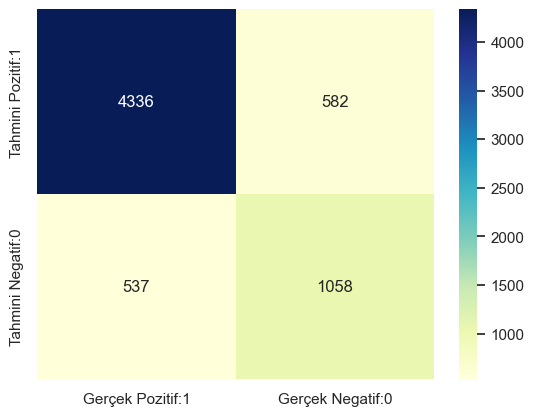

In [94]:
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Gerçek Pozitif:1', 'Gerçek Negatif:0'],
                          index=['Tahmini Pozitif:1', 'Tahmini Negatif:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 14. Sınıflandırma Raporu

**Sınıflandırma raporu**, sınıflandırma modeli performansını değerlendirmenin başka bir yoludur. Modelin **hassaslık**, **geri çağırma**, ve **f1** puanlarını görüntüler. 

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.88      0.89      4918
        >50K       0.65      0.66      0.65      1595

    accuracy                           0.83      6513
   macro avg       0.77      0.77      0.77      6513
weighted avg       0.83      0.83      0.83      6513



## 18. Prediction

In [98]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score: {0:0.4f}'.format(accuracy))
    print(classification_report(y_test, y_pred))
# Modeli değerlendir
evaluate_model(rfc_100, X_test, y_test)

# Yeni veriyi tanımla
new_data = {
  "age": 49,
  "workclass": "Private",
  "fnlwgt": 160187,
  "education": "9th",
  "education_num": 5,
  "marital_status": "Married-spouse-absent",
  "occupation": "Other-service",
  "relationship": "Not-in-family",
  "race": "Black",
  "sex": "Female",
  "capital_gain": 0,
  "capital_loss": 0,
  "hours_per_week": 16,
  "native_country": "Jamaica"
}

# Yeni veriyi DataFrame'e dönüştür
new_data_df = pd.DataFrame([new_data])

# Kodlayıcıyı yükle
# Yüklenen kodlayıcıyı kullanarak yeni veriyi ön işle
new_data_encoded = encoder.transform(new_data_df)

# Tahmin yap
prediction = rfc_100.predict(new_data_encoded)

print("Predicted income category:", prediction)

Model accuracy score: 0.8442
              precision    recall  f1-score   support

       <=50K       0.90      0.90      0.90      4918
        >50K       0.68      0.68      0.68      1595

    accuracy                           0.84      6513
   macro avg       0.79      0.79      0.79      6513
weighted avg       0.84      0.84      0.84      6513

Predicted income category: [' <=50K']
